In [2]:
#importing the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#loading the datasets
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
actual=pd.read_csv('gender_submission.csv')

In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train_data.describe()

C:\Users\shreya\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#checking for mising values
train_data.apply(lambda x: sum(x.isnull()))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#The features like Cabin,Ticket number or name are dropped
train_data.drop(['Cabin','Ticket','Name'],axis=1,inplace=True)

In [10]:
train_data.shape

(891, 9)

In [11]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
#Handling missing values for Age.
train_data.Age = train_data['Age'].fillna(value = train_data['Age'].mean())

In [13]:
#Left over misiing values
train_data.apply(lambda x: sum(x.isnull()))

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [14]:
#converting string to categorical values
replace_data= {'male' :0 , 'female' :1}
train_data.Sex = train_data.Sex.replace(replace_data)
replace1 = {'C':0,'Q':1,'S':2}
train_data.Embarked = train_data.Embarked.replace(replace1)

In [15]:
train_data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2.0
1,2,1,1,1,38.0,1,0,71.2833,0.0


In [16]:
#Handling the missing value for Embarked
train_data.Embarked = train_data['Embarked'].fillna(value = train_data['Embarked'].median())

In [17]:
#No more missing values
train_data.apply(lambda x: sum(x.isnull()))

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

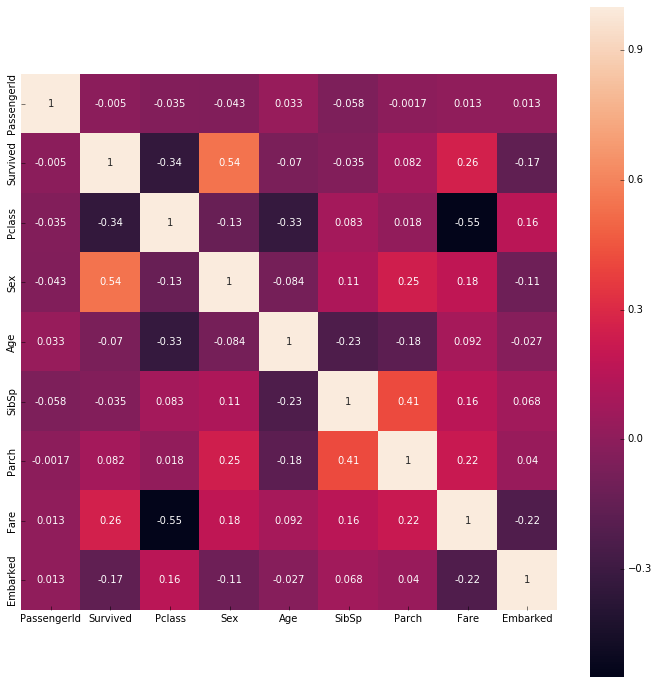

In [18]:
#Correlation
corr = train_data.select_dtypes(include = ['float64', 'int64']).corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True , annot = True)
plt.show()

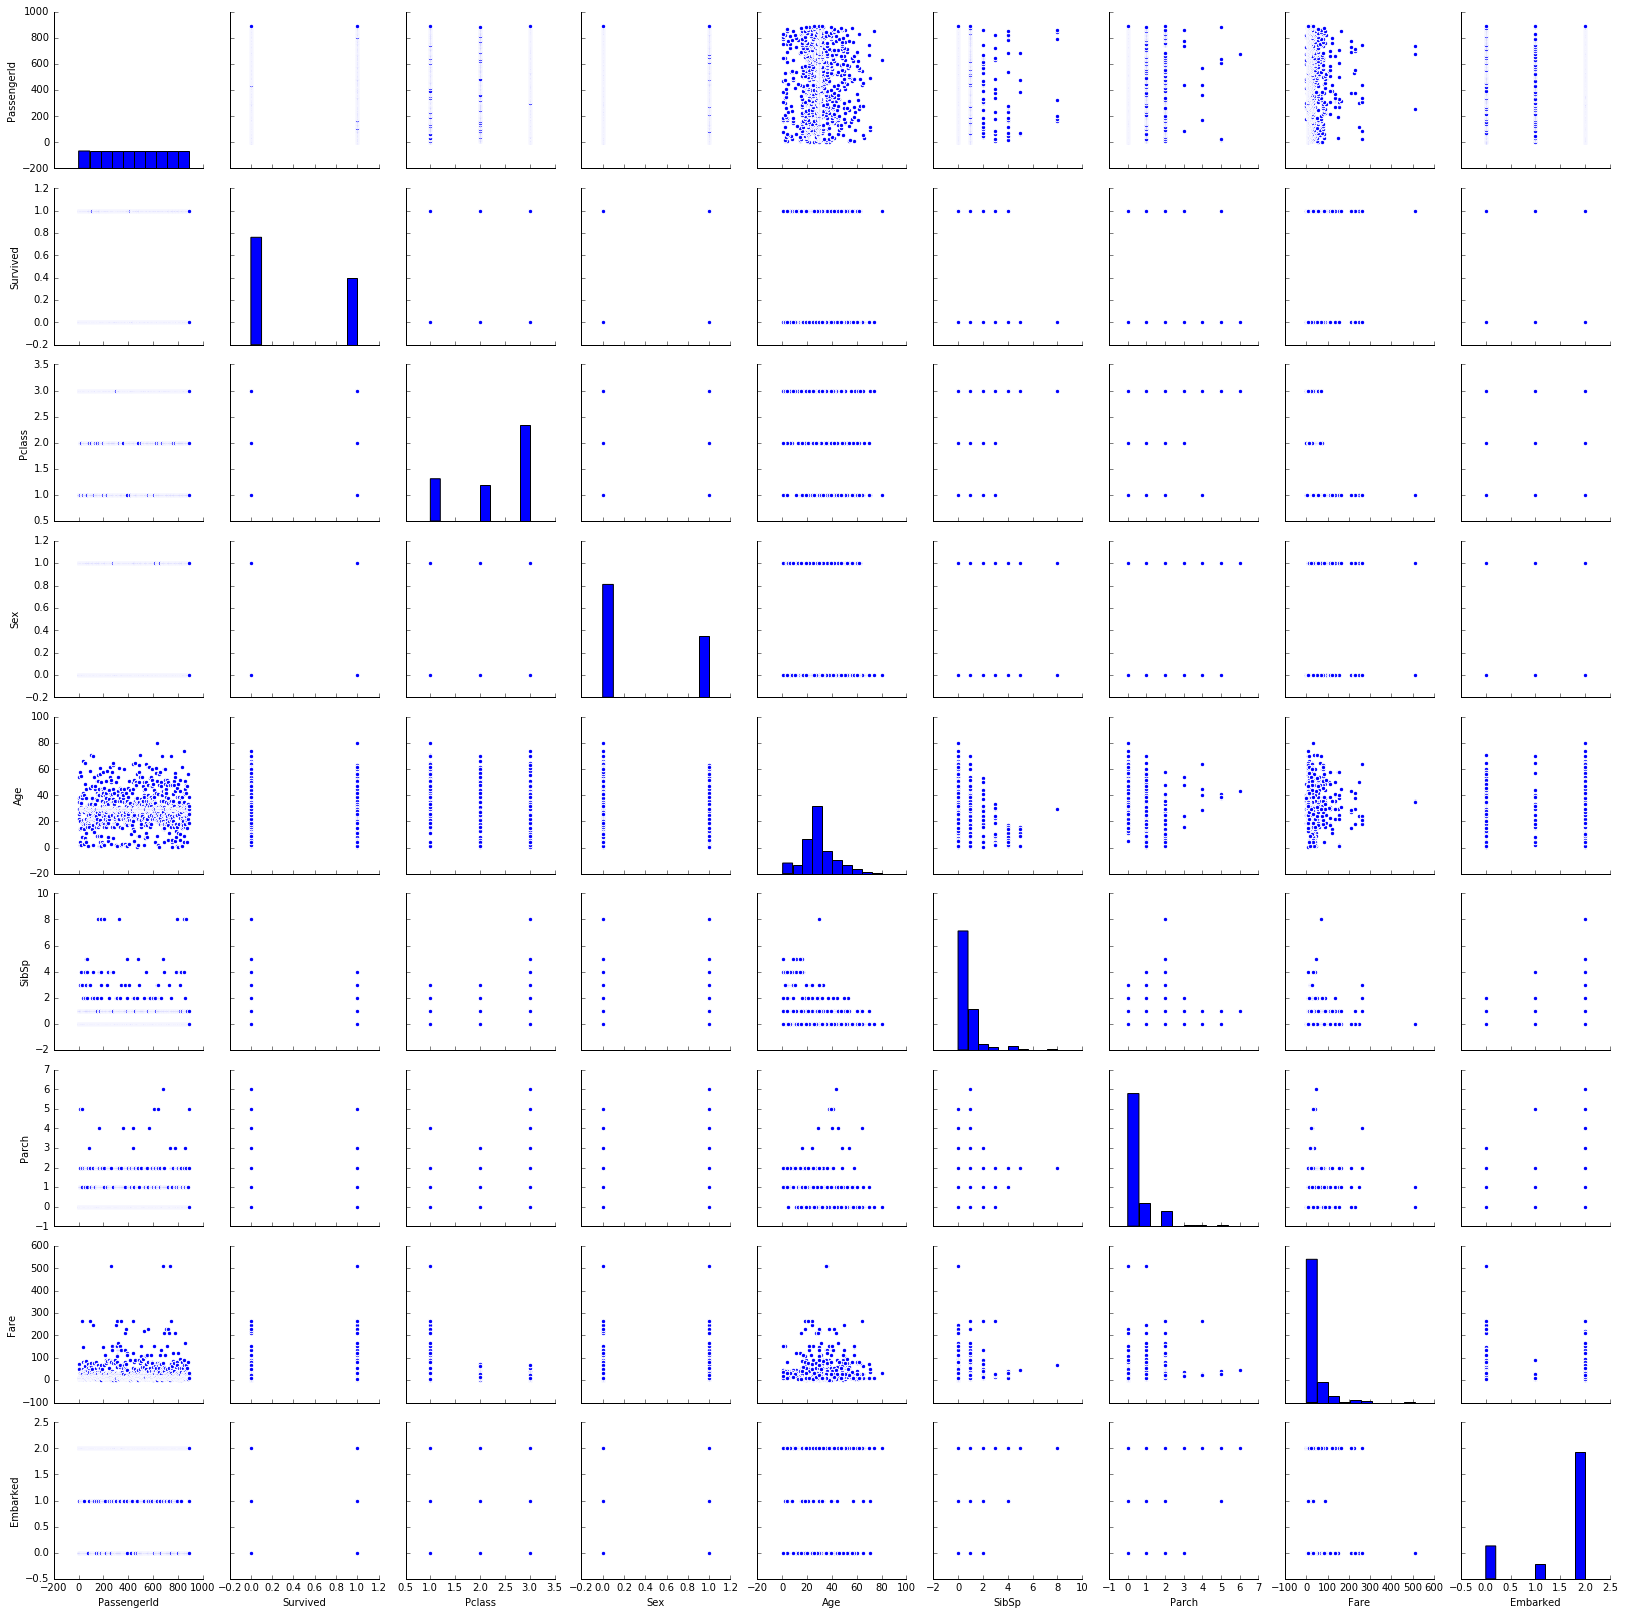

In [19]:
sns.pairplot(train_data)

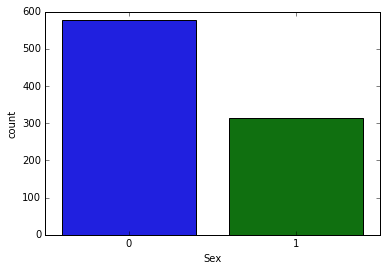

In [23]:
#data visualizations
sns.countplot(x='Sex', data=train_data)

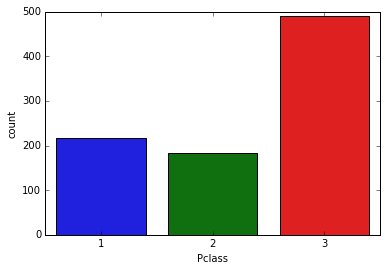

In [24]:
sns.countplot(x='Pclass', data=train_data)

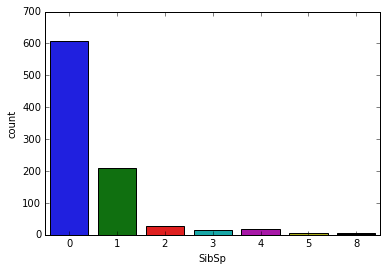

In [25]:
sns.countplot(x='SibSp', data=train_data)

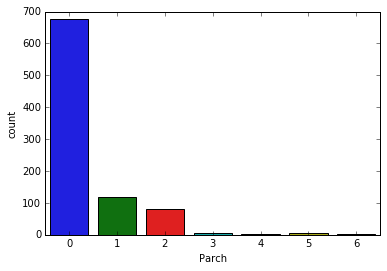

In [26]:
sns.countplot(x='Parch', data=train_data)

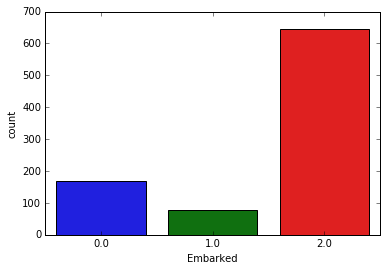

In [27]:
sns.countplot(x='Embarked', data=train_data)

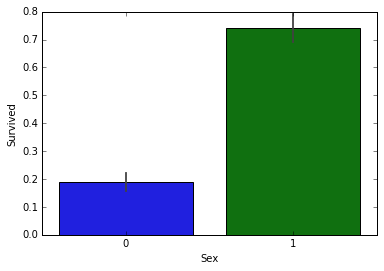

In [29]:
sns.barplot(x='Sex', y='Survived',data= train_data)

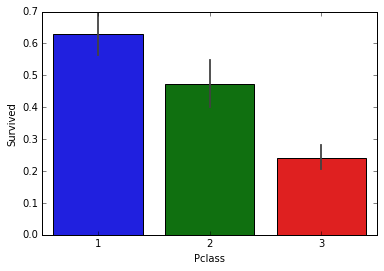

In [36]:
#The people who survived majorly belnged to first class
sns.barplot(x='Pclass', y='Survived',data= train_data)

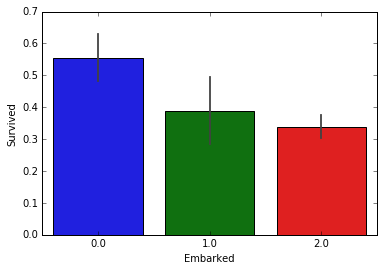

In [37]:
sns.barplot(x='Embarked', y='Survived',data= train_data)

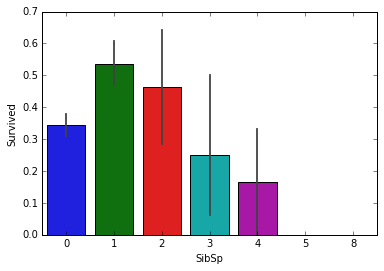

In [38]:
sns.barplot(x='SibSp', y='Survived',data= train_data)

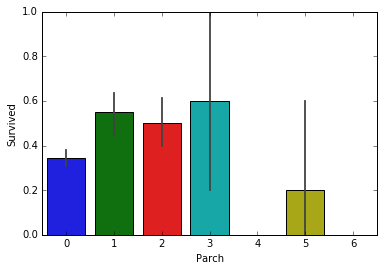

In [39]:
sns.barplot(x='Parch', y='Survived',data= train_data)

In [40]:
train_data.drop(['Parch'],axis=1,inplace=True) #There isn't much of a difference with survival of people with parent/children.

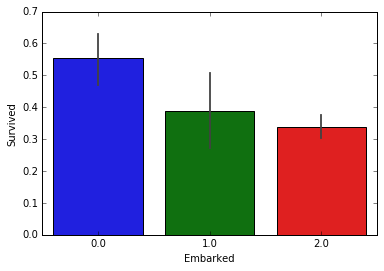

In [41]:
sns.barplot(x='Embarked', y='Survived',data= train_data)

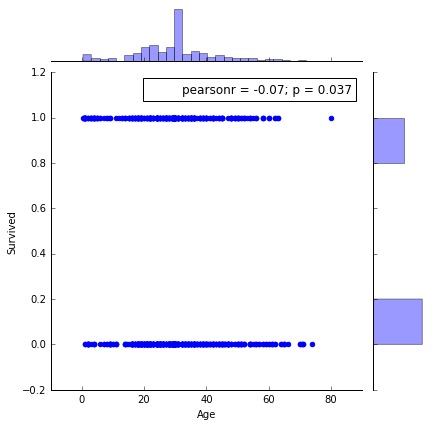

In [461]:
sns.jointplot(x='Age',y='Survived',data=train_data)

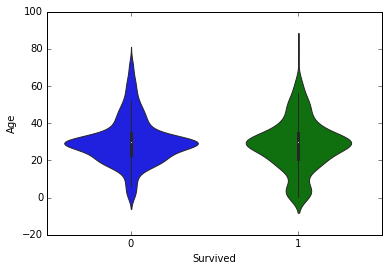

In [42]:
#the right plot shows that children(age_range: 3-12 approx) had a higher rate of survival.
sns.violinplot(x='Survived',y='Age',data=train_data)

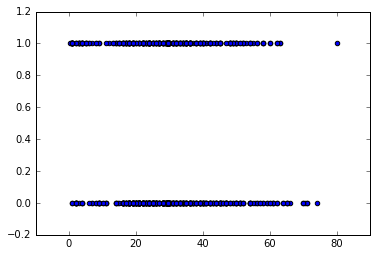

In [464]:
plt.scatter(x='Age',y='Survived',data=train_data)

In [43]:
#We know that how fare increases with the class of passengers.
#Also,Fare and Pclass were highly correlated as per the correlation plot. So, we can remove one of them.
train_data.drop(['Fare'],axis=1,inplace=True)

In [44]:
train_data.shape

(891, 7)

In [45]:
X = train_data.drop('Survived',axis=1)
y= train_data['Survived']

In [46]:
#train-test-split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [48]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train)
pred=model1.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test,pred))
print (confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.77      0.86      0.82       154
          1       0.78      0.66      0.71       114

avg / total       0.78      0.78      0.77       268

[[133  21]
 [ 39  75]]


In [50]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)
predictn=model2.predict(X_test)

In [51]:
print (classification_report(y_test,predictn))
print (confusion_matrix(y_test,predictn))

             precision    recall  f1-score   support

          0       0.74      0.83      0.78       154
          1       0.73      0.61      0.66       114

avg / total       0.73      0.74      0.73       268

[[128  26]
 [ 45  69]]


In [52]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model3= RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 25, random_state = 1)
model3.fit(X_train,y_train)
prediction= model3.predict(X_test)

In [53]:
print (classification_report(y_test,prediction))
print (confusion_matrix(y_test,prediction))

             precision    recall  f1-score   support

          0       0.77      0.91      0.83       154
          1       0.84      0.63      0.72       114

avg / total       0.80      0.79      0.79       268

[[140  14]
 [ 42  72]]


In [54]:
test_data.shape

(418, 11)

In [55]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
test_data.apply(lambda x: sum(x.isnull()))

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [57]:
test_data.drop(['Name','Ticket','Fare','Parch'],axis=1,inplace = True)

In [58]:
test_data.drop(['Cabin'],axis=1,inplace = True)

In [59]:
test_data.shape

(418, 6)

In [60]:
#missing value
test_data.Age = test_data['Age'].fillna(value = test_data['Age'].mean())

In [61]:
#string to categorical value conversion
replace_data1= {'male' :0 , 'female' :1}
test_data.Sex = test_data.Sex.replace(replace_data1)
replace12 = {'C':0,'Q':1,'S':2}
test_data.Embarked = test_data.Embarked.replace(replace12)

In [62]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Embarked
0,892,3,0,34.5,0,1
1,893,3,1,47.0,1,2
2,894,2,0,62.0,0,1
3,895,3,0,27.0,0,2
4,896,3,1,22.0,1,2


In [63]:
#GradientBoostingClassifier with default parameters
from sklearn.ensemble import GradientBoostingClassifier
model4= GradientBoostingClassifier()
model4.fit(X_train,y_train)
predn=model4.predict(X_test)

In [64]:
print (classification_report(y_test,predn))
print (confusion_matrix(y_test,predn))

             precision    recall  f1-score   support

          0       0.81      0.92      0.86       154
          1       0.86      0.70      0.77       114

avg / total       0.83      0.82      0.82       268

[[141  13]
 [ 34  80]]


In [65]:
#predicting on test data
model4.fit(X_train,y_train)
predictions=model4.predict(test_data)

In [66]:
actual.drop(['PassengerId'],axis=1,inplace=True)

In [67]:
actual.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [68]:
#testing with actual values
#We observe that the accuracy on test data is highest with GBM amongst all other models. 
print confusion_matrix(actual,predictions)
print classification_report(actual,predictions)

[[258   8]
 [ 45 107]]
             precision    recall  f1-score   support

          0       0.85      0.97      0.91       266
          1       0.93      0.70      0.80       152

avg / total       0.88      0.87      0.87       418



In [69]:
pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':predictions}).to_csv('titanic_predictions.csv',index=False)